In [1]:
import numpy as np
import pandas as pd

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0.
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式： 1000 * （房屋所在镇非美籍人口所在比例 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [2]:
data = pd.read_csv(r"./data/boston.csv")
# data
# 查看数据的基本信息.同时，也可以用来查看，各个特征列是否存在缺失值。
data.info()
# 查看是否具有重复值。
# data.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [3]:
class LinearRegression:
    """使用Python实现的线性回归。（最小二乘法）"""
    
    def fit(self, X, y):
        """根据提供的训练数据X，对模型进行训练。
        
        Parameters
        -----
        X : 类数组类型。形状： [样本数量， 特征数量]
            特征矩阵，用来对模型进行训练。
            
        y : 类数组类型，形状： [样本数量]
        
        """
        # 说明：如果X是数组对象的一部分，而不是完整的对象数据（例如，X是由其他对象通过切片传递过来），
        # 则无法完成矩阵的转换。
        # 这里创建X的拷贝对象，避免转换矩阵的时候失败。
        X = np.asmatrix(X.copy())
        # y是一维结构（行向量或列向量），一维结构可以不用进行拷贝。
        # 注意：我们现在要进行矩阵的运算，因此需要是二维的结构，我们通过reshape方法进行转换。
        y = np.asmatrix(y).reshape(-1, 1)
        # 通过最小二乘公式，求解出最佳的权重值。
        self.w_ = (X.T * X).I * X.T * y
        
    def predict(self, X):
        """根据参数传递的样本X，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型。形状： [样本数量， 特征数量]
            待预测的样本特征（属性）。
            
        Returns
        -----
        result : 数组类型
            预测的结果。
        
        """
        # 将X转换成矩阵，注意，需要对X进行拷贝。
        X = np.asmatrix(X.copy())
        result = X * self.w_
        # 将矩阵转换成ndarray数组，进行扁平化处理，然后返回结果。
        # 使用ravel可以将数组进行扁平化处理。
        return np.array(result).ravel()

In [4]:
# 不考虑截距的情况
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
# 查看模型的权重值
display(lr.w_)

17.012679698466734

matrix([[-9.18342810e-02],
        [ 4.39241264e-02],
        [ 6.03666834e-03],
        [ 2.41855561e+00],
        [-3.33200936e+00],
        [ 5.58715607e+00],
        [-2.15854534e-03],
        [-8.56861175e-01],
        [ 2.27259981e-01],
        [-1.18811255e-02],
        [-2.52949647e-01],
        [ 1.50099506e-02],
        [-4.56877090e-01]])

In [5]:
# 考虑截距，增加一列，该列的所有值都是1。
t = data.sample(len(data), random_state=0)
# 可以这样增加一列。
# t["Intercept"] = 1
# 按照习惯，截距作为w0，我们为之而配上一个x0，x0列放在最前面。
new_columns = t.columns.insert(0, "Intercept")
# 重新安排列的顺序，如果值为空，则使用fill_value参数指定的值进行填充。
t = t.reindex(columns=new_columns, fill_value=1)
# t["Intercept"] = 1
# t
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
display(lr.w_)

17.101003508572763

matrix([[ 4.00945995e+01],
        [-1.09547194e-01],
        [ 4.10831831e-02],
        [ 1.18301009e-02],
        [ 2.03476430e+00],
        [-1.95745194e+01],
        [ 3.28214790e+00],
        [ 6.97061145e-03],
        [-1.39788591e+00],
        [ 3.77818627e-01],
        [-1.54858651e-02],
        [-8.65309243e-01],
        [ 8.40572928e-03],
        [-5.67832943e-01]])

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

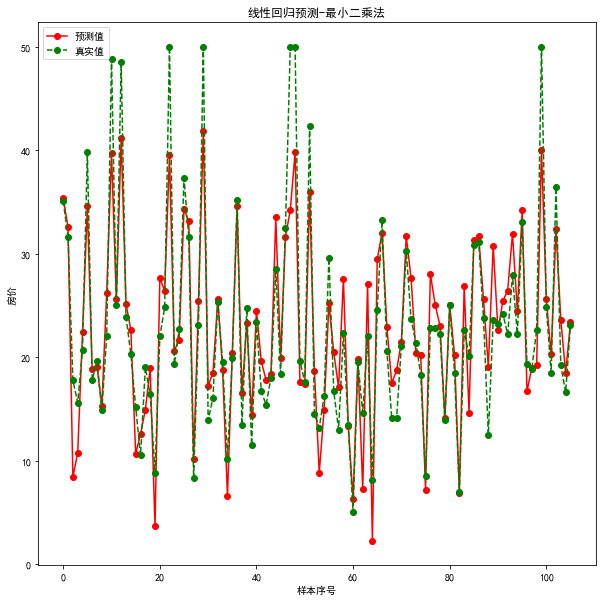

In [7]:
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, "ro-", label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go--", label="真实值")
plt.title("线性回归预测-最小二乘法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()